DATA ACQUSITION

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_train=pd.read_csv('train.csv')

In [ ]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
data_train.shape

(7613, 5)

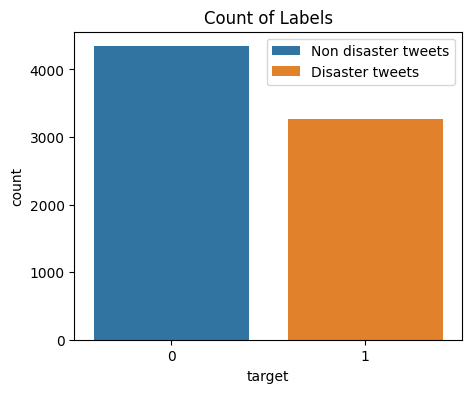

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x = 'target', data = data_train, hue='target')

plt.title('Count of Labels')
plt.legend(labels=['Non disaster tweets', 'Disaster tweets'])
plt.show()

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


**PreProcessing And Cleaning**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

*Removing Null value from tweets csv*

In [ ]:
print(data_train['text'].isnull().sum())

0


In [ ]:
data_train= data_train.dropna(subset=['text'])  # Drop rows with missing text


In [ ]:
missing_val = pd.DataFrame(data_train.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,id,0
1,keyword,61
2,location,2533
3,text,0
4,target,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve

import re
import string
import tqdm
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions

data_train['clean_text'] = data_train['text'].apply(lambda x: remove_URL(x))
data_train['clean_text'] = data_train['clean_text'].apply(lambda x: remove_emoji(x))
data_train['clean_text'] = data_train['clean_text'].apply(lambda x: remove_html(x))
data_train['clean_text'] = data_train['clean_text'].apply(lambda x: remove_punct(x))

In [ ]:
# Select only the relevant columns
selected_columns = data_train[['id','keyword','location','clean_text','target']]

# Save the selected columns to a CSV file
selected_columns.to_csv('disaster_tweets_cleaned.csv', index=False)


In [ ]:
selected_columns.head()

,id,keyword,location,clean_text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1


In [ ]:
train=pd.read_csv('disaster_tweets_cleaned.csv')

In [ ]:
missing_val = pd.DataFrame(train.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,id,0
1,keyword,61
2,location,2533
3,clean_text,0
4,target,0


In [ ]:
from nltk.tokenize import word_tokenize

# Ensure the 'clean_text' column has no NaN values and convert to string
train['clean_text'] = train['clean_text'].fillna('').astype(str)

# Tokenize the cleaned texts
train['tokenized'] = train['clean_text'].apply(word_tokenize)


In [ ]:
train.head()

,id,keyword,location,clean_text,target,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to shelter in place are be...,1,"[All, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1,"[Just, got, sent, this, photo, from, Ruby, Ala..."


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from xgboost import XGBClassifier
import torch
from transformers import BertTokenizer, BertModel


In [ ]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))

# Fit and transform the cleaned tweet texts
X_tfidf = tfidf_vectorizer.fit_transform(train['clean_text'])


In [ ]:
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding=True)
    outputs = model(**inputs)
    embeddings = torch.mean(outputs.last_hidden_state, dim=1)  # Mean pooling of token embeddings
    return embeddings.detach().numpy()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Function to combine TF-IDF vectors with BERT embeddings
def combine_features(tfidf_vec, text):
    tfidf_vec = tfidf_vec.toarray()  # Convert sparse matrix to dense
    bert_embeddings = get_bert_embeddings(text)
    combined_features = np.concatenate((tfidf_vec, bert_embeddings), axis=1)
    return combined_features

# Apply the combination to all texts
combined_features = np.vstack([combine_features(X_tfidf[i], train['clean_text'].iloc[i]) for i in range(len(train))])


In [ ]:
# Function to evaluate multiple classifiers
def evaluate_classifiers(X, y):
    classifiers = [
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('KNN Classifier', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('SVM (linear kernel)', SVC(kernel='linear')),
        ('Random Forest', RandomForestClassifier())
    ]
    results = []

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, clf in classifiers:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        results.append((name, f1))

    # Create a DataFrame to display the results
    results_df = pd.DataFrame(results, columns=['Classifier', 'Average F1-score'])
    return results_df

# Target variable
y = train['target']

# Evaluate classifiers
results_df = evaluate_classifiers(combined_features, y)
print(results_df)


            Classifier  Average F1-score
0  Logistic Regression          0.774659
1       KNN Classifier          0.746057
2        Decision Tree          0.632854
3  SVM (linear kernel)          0.772763
4        Random Forest          0.737311


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np


In [ ]:
# Assuming combined_features is the feature matrix from TF-IDF and BERT combined
# and y is the target variable

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(combined_features, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# # Define the parameter grid for Random Forest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Initialize Random Forest classifier
# rf = RandomForestClassifier()

# # Initialize GridSearchCV with cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print(f"Best Parameters: {best_params}")

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Train Random Forest with best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_split=5)

In [ ]:
# Predictions on validation set
y_val_pred = best_rf.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy}")
print(f"Validation Precision: {precision}")
print(f"Validation Recall: {recall}")
print(f"Validation F1-Score: {f1}")


Validation Accuracy: 0.8117338003502627
Validation Precision: 0.844632768361582
Validation Recall: 0.6514161220043573
Validation F1-Score: 0.7355473554735548


In [ ]:
# Predictions on test set
y_test_pred = best_rf.predict(X_test)

# Calculate final evaluation metrics
final_accuracy = accuracy_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred)
final_recall = recall_score(y_test, y_test_pred)
final_f1 = f1_score(y_test, y_test_pred)

print(f"Test Accuracy: {final_accuracy}")
print(f"Test Precision: {final_precision}")
print(f"Test Recall: {final_recall}")
print(f"Test F1-Score: {final_f1}")


Test Accuracy: 0.8012259194395797
Test Precision: 0.8783783783783784
Test Recall: 0.6410256410256411
Test F1-Score: 0.7411630558722919
